# <font color='blue'>Data Science Academy - Big Data Real-Time Analytics com Python e Spark</font>
# <font color='blue'>Capítulo 3</font>

****** Este Jupyter Notebook foi atualizado para a versão 3.6.1. da Linguagem Python em 13/06/2017 ******

## Séries Temporais

In [1]:
!pip install pandas_datareader

In [2]:
import datetime
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline  

In [3]:
style.use('fivethirtyeight')

In [4]:
help(style.use)

Help on function use in module matplotlib.style.core:

use(style)
    Use matplotlib style settings from a style specification.
    
    The style name of 'default' is reserved for reverting back to
    the default style settings.
    
    Parameters
    ----------
    style : str, dict, or list
        A style specification. Valid options are:
    
        +------+-------------------------------------------------------------+
        | str  | The name of a style or a path/URL to a style file. For a    |
        |      | list of available style names, see `style.available`.       |
        +------+-------------------------------------------------------------+
        | dict | Dictionary with valid key/value pairs for                   |
        |      | `matplotlib.rcParams`.                                      |
        +------+-------------------------------------------------------------+
        | list | A list of style specifiers (str or dict) applied from first |
        |      |

In [5]:
print(plt.style.available)

['dark_background', 'seaborn-darkgrid', 'seaborn-white', 'seaborn-colorblind', 'seaborn-muted', 'seaborn-whitegrid', 'seaborn-notebook', 'seaborn-paper', 'grayscale', 'seaborn-ticks', 'seaborn-deep', 'seaborn-talk', 'seaborn-dark', 'classic', 'seaborn-poster', 'seaborn-dark-palette', 'ggplot', 'seaborn-bright', 'fivethirtyeight', 'bmh', 'seaborn-pastel']


In [6]:
start = datetime.datetime(2016, 7, 1)
end = datetime.datetime(2016, 7, 31)
empresa = 'PBR'
ptbr = web.get_data_yahoo(empresa, start, end)

In [7]:
type(ptbr)

pandas.core.frame.DataFrame

In [8]:
ptbr.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-01,7.14,7.52,7.13,7.47,25183400,7.47
2016-07-05,7.06,7.12,6.80,6.88,25078200,6.88
2016-07-06,6.74,7.03,6.62,7.00,20523600,7.00
2016-07-07,7.24,7.58,7.08,7.12,38583100,7.12
2016-07-08,7.53,7.58,7.34,7.47,21445300,7.47


In [9]:
ptbr['Open']

Date
2016-07-01    7.14
2016-07-05    7.06
2016-07-06    6.74
2016-07-07    7.24
2016-07-08    7.53
2016-07-11    7.61
2016-07-12    8.03
2016-07-13    7.88
2016-07-14    8.22
2016-07-15    8.14
2016-07-18    8.08
2016-07-19    8.40
2016-07-20    8.37
2016-07-21    8.41
2016-07-22    8.40
2016-07-25    8.51
2016-07-26    8.30
2016-07-27    8.45
2016-07-28    8.18
2016-07-29    8.40
Name: Open, dtype: float64

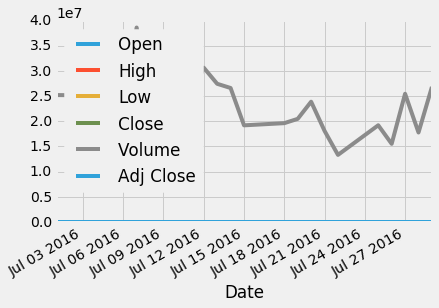

In [10]:
ptbr.plot()

In [11]:
PTBR_final_prices = pd.DataFrame(ptbr['Close'])

In [12]:
PTBR_final_prices

,Close
Date,
2016-07-01,7.47
2016-07-05,6.88
2016-07-06,7.00
2016-07-07,7.12
2016-07-08,7.47
2016-07-11,7.77
2016-07-12,8.08
2016-07-13,7.92
2016-07-14,8.21


In [14]:
PTBR_final_prices.isnull()

,Close
Date,
2016-07-01,False
2016-07-05,False
2016-07-06,False
2016-07-07,False
2016-07-08,False
2016-07-11,False
2016-07-12,False
2016-07-13,False
2016-07-14,False


In [16]:
PTBR_final_prices.notnull()

,Close
Date,
2016-07-01,True
2016-07-05,True
2016-07-06,True
2016-07-07,True
2016-07-08,True
2016-07-11,True
2016-07-12,True
2016-07-13,True
2016-07-14,True


<h3>Operações com Datas</h3>

In [17]:
natal = pd.datetime(2015,12,25)
natal

datetime.datetime(2015, 12, 25, 0, 0)

In [18]:
boxingDay = natal + pd.DateOffset(days = 1)
boxingDay

Timestamp('2015-12-26 00:00:00')

In [19]:
boxingDay + pd.DateOffset(weeks = 1)

Timestamp('2016-01-02 00:00:00')

In [20]:
boxingDay + 2 * pd.DateOffset(years = 2, months = 6)

Timestamp('2020-12-26 00:00:00')

In [21]:
lastDay = pd.datetime(2016,12,31)

In [22]:
from pandas.tseries.offsets import QuarterBegin

In [23]:
dtoffset = QuarterBegin()
lastDay + dtoffset

Timestamp('2017-03-01 00:00:00')

In [24]:
firstQuarterLastDay = pd.datetime(2015,3,31)

In [25]:
dtoffset.rollforward(firstQuarterLastDay)

Timestamp('2015-06-01 00:00:00')

In [26]:
today = pd.datetime.now()

<b> 1 semana a partir de hoje</b>

In [27]:
today + pd.DateOffset(weeks = 1)

Timestamp('2016-09-05 18:18:20.128655')

<b>5 anos a partir de hoje</b>

In [28]:
today + 2 * pd.DateOffset(years = 2, months = 6)

Timestamp('2021-08-28 18:18:20.128655')

<h3>Conversão entre tipos de dados para Séries Temporais</h3>

In [29]:
worldCupFinal = pd.to_datetime('07/13/2015')
worldCupFinal

Timestamp('2015-07-13 00:00:00')

In [30]:
worldCupFinal.to_period('D')

Period('2015-07-13', 'D')

In [31]:
worldCupKickoff=pd.Period('06/12/2015','D')
worldCupKickoff

Period('2015-06-12', 'D')

In [32]:
worldCupKickoff.to_timestamp()

Timestamp('2015-06-12 00:00:00')

In [33]:
worldCupDays=pd.date_range('06/12/2014', periods = 32, freq = 'D')
worldCupDays

DatetimeIndex(['2014-06-12', '2014-06-13', '2014-06-14', '2014-06-15',
               '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-19',
               '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23',
               '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27',
               '2014-06-28', '2014-06-29', '2014-06-30', '2014-07-01',
               '2014-07-02', '2014-07-03', '2014-07-04', '2014-07-05',
               '2014-07-06', '2014-07-07', '2014-07-08', '2014-07-09',
               '2014-07-10', '2014-07-11', '2014-07-12', '2014-07-13'],
              dtype='datetime64[ns]', freq='D')

In [34]:
worldCupDays.to_period()

PeriodIndex(['2014-06-12', '2014-06-13', '2014-06-14', '2014-06-15',
             '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-19',
             '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23',
             '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27',
             '2014-06-28', '2014-06-29', '2014-06-30', '2014-07-01',
             '2014-07-02', '2014-07-03', '2014-07-04', '2014-07-05',
             '2014-07-06', '2014-07-07', '2014-07-08', '2014-07-09',
             '2014-07-10', '2014-07-11', '2014-07-12', '2014-07-13'],
            dtype='int64', freq='D')

<h2>Plot com Matplotlib</h2>

In [35]:
import numpy as np

In [36]:
X = np.linspace(-np.pi, np.pi, 256, endpoint = True)

In [37]:
f,g = np.cos(X) + np.sin(X), np.sin(X) - np.cos(X)

In [38]:
f_serie = pd.Series(f)
g_serie = pd.Series(g)

In [39]:
plotDF = pd.concat([f_serie, g_serie], axis = 1)
plotDF.index = X
plotDF.columns = ['sin(x)+cos(x)','sin(x)-cos(x)']
plotDF.head()

,sin(x)+cos(x),sin(x)-cos(x)
-3.141593,-1.000000,1.000000
-3.116953,-1.024334,0.975059
-3.092313,-1.048046,0.949526
-3.067673,-1.071122,0.923417
-3.043033,-1.093547,0.896747


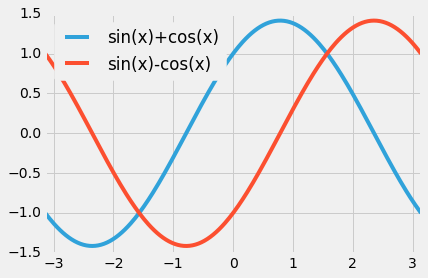

In [40]:
plotDF.plot()
plt.show()

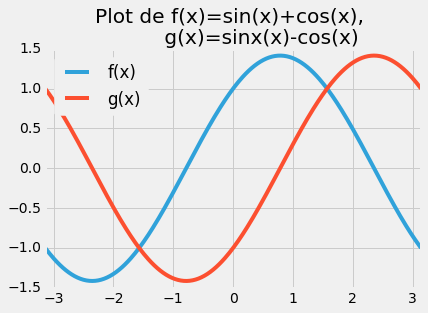

In [41]:
plotDF.columns = ['f(x)','g(x)']
plotDF.plot(title = 'Plot de f(x)=sin(x)+cos(x), \n         g(x)=sinx(x)-cos(x)')
plt.show()

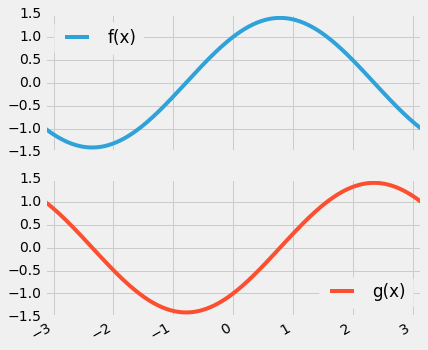

In [42]:
# Subplots
plotDF.plot(subplots = True, figsize = (6,6))
plt.show()

# FIM

### Obrigado - Data Science Academy - <a href=http://facebook.com/dsacademy>facebook.com/dsacademybr</a>